In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame([[8,8,1] , [7,9,1] , [6,7,0] , [5,5,0]] , columns = ['cgpa' , 'profile_score' , 'placed'])

In [ ]:
df

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,7,0
3,5,5,0


In [ ]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters ={}
  L =len(layer_dims)

  for l in range(1,L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1] , layer_dims[l]))*0.1
    parameters['b' +str(l)] =np.zeros((layer_dims[l] , 1))

  return parameters

In [ ]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [ ]:
X = df[['cgpa' , 'profile_score']].values[0].reshape(2,1)         # shape(no. of features , no. of training example)
y = df[['placed']].values[0][0]

parameters = initialize_parameters([2,2,1])

In [ ]:
def linear_forward(A_prev , W , b):

  Z = np.dot(W.T , A_prev) +b
  A = 1/(1+np.exp(-Z))

  return A

In [ ]:
# Forward Propagation

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2      # no.of layers in the neural network

  for l in range(1 , L+1):
    A_prev = A
    W1 = parameters['W' + str(l)]
    b1 = parameters['b' + str(l)]
    #print("A"+str(l-1)+":",A_prev)
    #print("W"+str(l)+":",W1)
    #print("b"+str(l)+":",b1)
    #print("--" * 20)

    A  = linear_forward(A_prev , W1 , b1)
    #print("A"+str(l)+":",A)
    #print("**" * 20)

  return A , A_prev

In [ ]:
X

array([[8],
       [8]])

In [ ]:
y

1

In [ ]:
y_hat , A1 = L_layer_forward(X , parameters)

A0: [[8]
 [8]]
W1: [[0.1 0.1]
 [0.1 0.1]]
b1: [[0.]
 [0.]]
----------------------------------------
A1: [[0.83201839]
 [0.83201839]]
****************************************
A1: [[0.83201839]
 [0.83201839]]
W2: [[0.1]
 [0.1]]
b2: [[0.]]
----------------------------------------
A2: [[0.54150519]]
****************************************


In [ ]:
y_hat = y_hat[0][0]

In [ ]:
def update_parameters(parameters , y , y_hat , A1, X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y-y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y-y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['b2'][0][0] + (0.0001 * (y-y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y-y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y-y_hat)*parameters['W2'][1][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y-y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y-y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y-y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y-y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [ ]:
update_parameters(parameters , y , y_hat , A1, X)

In [ ]:
parameters

{'W1': array([[0.10001026, 0.10001026],
        [0.10001026, 0.10001026]]),
 'b1': array([[1.28235283e-06],
        [1.28235283e-06]]),
 'W2': array([[0.1000763],
        [0.1000763]]),
 'b2': array([[9.16989621e-05]])}

**epoch implementation**

In [ ]:
# epoch implementation

parameters = initialize_parameters([2,2,1])
epochs = 20
epoch_loss = []

for i in range(epochs):
  Loss = []

  for j in range(df.shape[0]):
    X = df[['cgpa' , 'profile_score']].values[j].reshape(2,1)
    y = df[['placed']].values[j][0]

    y_hat , A1 = L_layer_forward(X , parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters , y , y_hat , A1 , X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  epoch_loss.append(np.array(Loss).mean())
  print('Epoch - ',i+1,'Loss - ', epoch_loss[-1])

parameters

Epoch -  1 Loss -  0.6926641283552163
Epoch -  2 Loss -  0.6926633466155001
Epoch -  3 Loss -  0.6926625651826798
Epoch -  4 Loss -  0.6926617840566105
Epoch -  5 Loss -  0.692661003237148
Epoch -  6 Loss -  0.6926602227241474
Epoch -  7 Loss -  0.6926594425174647
Epoch -  8 Loss -  0.6926586626169551
Epoch -  9 Loss -  0.6926578830224743
Epoch -  10 Loss -  0.6926571037338783
Epoch -  11 Loss -  0.6926563247510228
Epoch -  12 Loss -  0.6926555460737636
Epoch -  13 Loss -  0.692654767701957
Epoch -  14 Loss -  0.6926539896354588
Epoch -  15 Loss -  0.6926532118741249
Epoch -  16 Loss -  0.6926524344178118
Epoch -  17 Loss -  0.6926516572663757
Epoch -  18 Loss -  0.6926508804196727
Epoch -  19 Loss -  0.6926501038775594
Epoch -  20 Loss -  0.6926493276398923


{'W1': array([[0.09997799, 0.09997799],
        [0.09998549, 0.09998549]]),
 'b1': array([[-1.35913086e-05],
        [-1.35913086e-05]]),
 'W2': array([[0.09989422],
        [0.09989422]]),
 'b2': array([[-0.00031716]])}

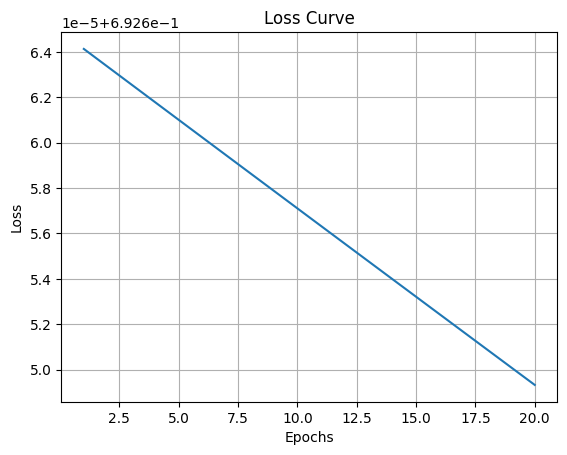

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, epochs+1) , epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.grid(True)
plt.show()